In [257]:
import numpy as np
import pandas as pd

In [258]:
# Append Header to the dataset
column_names=["fLength", "fWidth", "fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv('magic04.data',names=column_names)
df.head(3)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g


In [259]:
# Remove Duplicates
number_duplicates = df.duplicated().sum()
print("Number of duplicates: ", number_duplicates)
print("Number of rows before: ", df.shape[0])
df = df.drop_duplicates()
print("Number of rows after: ", df.shape[0])

Number of duplicates:  115
Number of rows before:  19020
Number of rows after:  18905


In [260]:
# Check for nulls
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [261]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000
mean,53.161416,22.145872,2.824643,0.380247,0.214560,-4.177867,10.618826,0.259364,27.551644,193.712554
std,42.259789,18.300664,0.472377,0.182709,0.110384,59.010059,50.900687,20.775268,26.083055,74.685712
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.359700,11.874200,2.477100,0.235800,0.128500,-20.479100,-12.769300,-10.835800,5.516400,142.269000
50%,37.129500,17.143800,2.740000,0.354000,0.196400,4.062900,15.338000,0.750000,17.533000,191.832000
75%,69.975400,24.712400,3.101100,0.503500,0.285000,24.133500,35.869400,10.948900,45.704000,240.409000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [262]:
df.head(1)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g


In [263]:
# Replace categorical data with numerical data
# 0: gamma
# 1: hadron
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['class']=le.fit_transform(df['class'])

In [264]:
df.head(1)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,0


number of gamma occurunces:  12332
number of hadrons occurunces:  6573


<Axes: ylabel='count'>

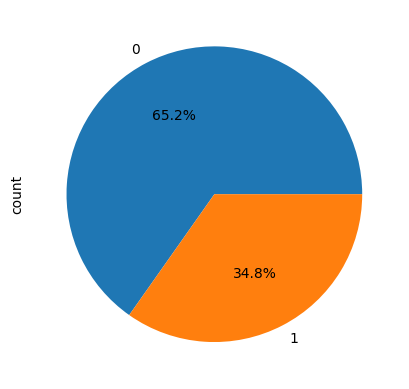

In [265]:
# Visualizing imbalance in the dataset
gamma = (df["class"] == 0).sum()
h = (df["class"] == 1).sum()
print("number of gamma occurunces: ", gamma)
print("number of hadrons occurunces: ", h)

y = df["class"]
y.value_counts().plot.pie(autopct="%1.1f%%")

In [266]:
# Visualizing corrolation between features and class using R value
# R = [-1,1]
corr_matrix = df.corr()
print(pd.DataFrame(corr_matrix["class"].sort_values(ascending=True)))

             class
fM3Long  -0.193503
fAsym    -0.172109
fConc    -0.025442
fConc1   -0.006053
fM3Trans  0.004516
fDist     0.063877
fSize     0.117792
fWidth    0.265948
fLength   0.308146
fAlpha    0.460421
class     1.000000


In [267]:
# Removing the features that has low correlation with the target variable
df = df.drop(["fConc1" , "fM3Trans","fConc","fDist"], axis=1)
df.head(2)

,fLength,fWidth,fSize,fAsym,fM3Long,fAlpha,class
0,28.7967,16.0021,2.6449,27.7004,22.0110,40.0920,0
1,31.6036,11.7235,2.5185,26.2722,23.8238,6.3609,0


<Axes: >

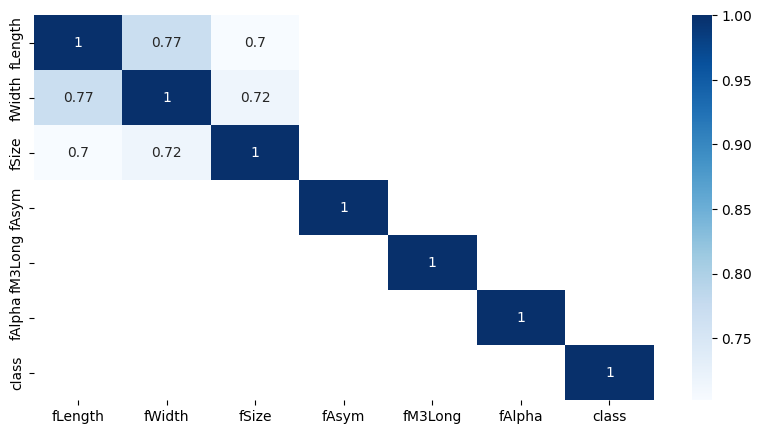

In [268]:
# checking for corrolated features to combine into 1
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
kot = corr_matrix[corr_matrix>=0.5]
plt.figure(figsize=(10,5))
sns.heatmap(kot, cmap="Blues" , annot=True)

In [269]:
# Combining width and length into one feature (Magnitude)
df["fMagnitude"] = (df["fWidth"] + df["fLength"])
df.drop(["fWidth", "fLength"], axis=1, inplace=True)
df.head(1)

,fSize,fAsym,fM3Long,fAlpha,class,fMagnitude
0,2.6449,27.7004,22.011,40.092,0,44.7988


In [270]:
# Under sampling to solve imbalance data
X = df.drop('class', axis=1)
y = df['class']

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)
X_res, y_res = rus.fit_resample(X, y)

In [271]:
clean_df = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.Series(y_res, name='class')], axis=1)
clean_df.head(2)

,fSize,fAsym,fM3Long,fAlpha,fMagnitude,class
5278,3.2024,-53.8742,51.5739,8.4866,81.5888,0
3137,2.4541,48.3458,33.6616,18.8968,59.1717,0


number of gamma occurunces:  6573
number of hadrons occurunces:  6573


<Axes: ylabel='count'>

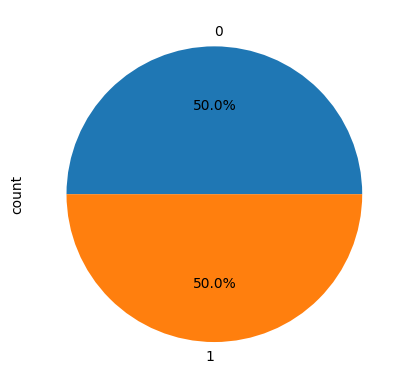

In [272]:
# Visualizing after undersampling
gamma = (clean_df["class"] == 0).sum()
h = (clean_df["class"] == 1).sum()
print("number of gamma occurunces: ", gamma)
print("number of hadrons occurunces: ", h)

y = clean_df["class"]
y.value_counts().plot.pie(autopct="%1.1f%%")

In [273]:
# Exporting for future use
clean_df.to_csv("clean_df.csv")